Test accuracy: 0.8889


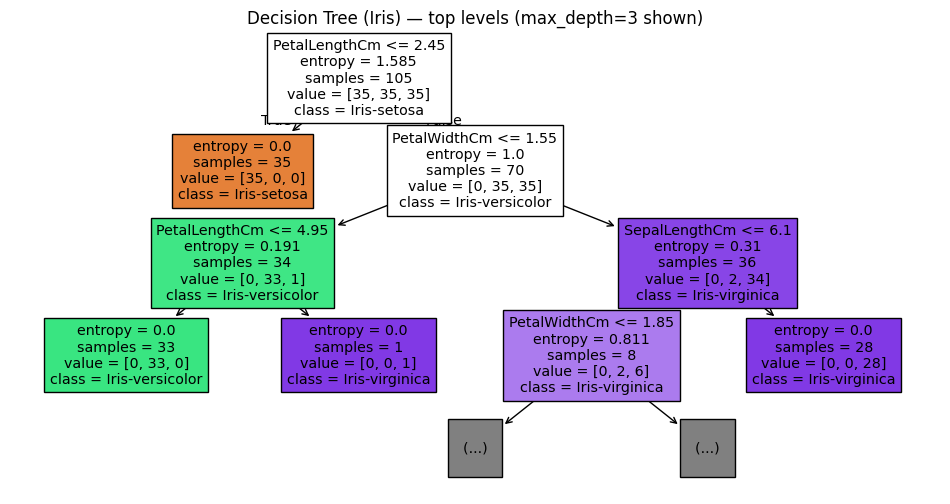


Feature importances (descending):
PetalLengthCm -> 0.6230261911372608
PetalWidthCm -> 0.33699486418612185
SepalLengthCm -> 0.027961235084780097
SepalWidthCm -> 0.012017709591837289

Most important feature (root split candidate): PetalLengthCm


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load Iris.csv (uploaded by user)
iris_path = 'Iris.csv'
df = pd.read_csv(iris_path)
# Some Iris.csv files include an 'Id' column; drop if present
if 'Id' in df.columns or 'id' in df.columns:
    df = df.drop(columns=[c for c in df.columns if c.lower()=='id'])
# If species column is named differently, attempt to find it
species_col = None
for name in ['Species','species','class','target']:
    if name in df.columns:
        species_col = name
        break
if species_col is None:
    raise ValueError('Could not find species/target column in Iris.csv. Columns: ' + ','.join(df.columns))

# Prepare X and y
X = df.drop(columns=[species_col])
y = df[species_col]

# Encode target if needed
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Split 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.30, random_state=42, stratify=y_enc)

# Train DT
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Predict & accuracy
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {acc:.4f}')

# Visualize tree
plt.figure(figsize=(12,6))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True, max_depth=3)
plt.title('Decision Tree (Iris) — top levels (max_depth=3 shown)')
plt.show()

# Identify root feature (feature with highest importance at root is the one with highest importance overall often)
import numpy as np
feat_importances = dict(zip(X.columns, clf.feature_importances_))
sorted_feats = sorted(feat_importances.items(), key=lambda x: x[1], reverse=True)
print('\nFeature importances (descending):')
for f,v in sorted_feats:
    print(f, '->', v)
# Root feature (highest importance)
root_feature = sorted_feats[0][0]
print(f'\nMost important feature (root split candidate): {root_feature}')